In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA


### Область работы 2 (поиск  модели .... )

In [5]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [11]:
df = pd.read_csv(path_train)
df

,BCS,Age,Sex,Length,Girth,Height,Weight
0,3.0,5-10,stallion,99,114,100,152
1,3.0,5-10,female,91,123,97,173
2,3.0,10-15,gelding,99,123,106,171
3,2.5,2-5,female,92,105,96,121
4,3.0,<2,female,86,105,92,100
...,...,...,...,...,...,...,...
375,3.0,>20,female,94,120,104,152
376,3.0,<2,stallion,68,92,86,72
377,3.0,10-15,female,104,122,101,163
378,3.0,10-15,female,101,125,103,190


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BCS     380 non-null    float64
 1   Age     380 non-null    object 
 2   Sex     380 non-null    object 
 3   Length  380 non-null    int64  
 4   Girth   380 non-null    int64  
 5   Height  380 non-null    int64  
 6   Weight  380 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 20.9+ KB


In [17]:
df.describe()

,BCS,Length,Girth,Height,Weight
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.901316,95.636842,116.026316,101.473684,153.021053
std,0.431446,7.499496,7.737060,4.460538,27.465682
min,1.000000,46.000000,66.000000,71.000000,27.000000
25%,2.500000,92.000000,113.000000,99.000000,139.750000
50%,3.000000,97.000000,117.000000,102.000000,157.000000
75%,3.000000,100.000000,121.000000,104.000000,172.000000
max,4.500000,112.000000,134.000000,113.000000,227.000000


In [20]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки BCS: [3.  2.5 4.  2.  3.5 4.5 1.5 1. ]
Уникальные элементы колонки Age: ['5-10' '10-15' '2-5' '<2' '15-20' '>20']
Уникальные элементы колонки Sex: ['stallion' 'female' 'gelding']
Уникальные элементы колонки Length: [ 99  91  92  86  87  88 102  95  98  84  97  96  90  93 101  83  74 103
 100  94  85 107  89 104  82  69 106 112  81  46 105  80 109 108 111  79
  78  77  76  68]
Уникальные элементы колонки Girth: [114 123 105 115 108 126 111 120 130 119 121 110 117  90 128 116 104 107
  95 118 113 109 122 125 127  97 101 124 100 131 112 134  96  66 102 129
  94 106 103  98 132  92]
Уникальные элементы колонки Height: [100  97 106  96  92  98 110 103 102 105 104 101  99  89 108  94 107 109
 112  95  93  91  71  90 111 113  86]
Уникальные элементы колонки Weight: [152 173 171 121 100 133 118 183 125 169 158 130 190 184 146 163 132 116
 162 147 126 117  71 167 134 213 155 131 102 144 140 156 120 136 165  90
 166 143 138 149 174 195 179 181 188 170 172 164  98 189 

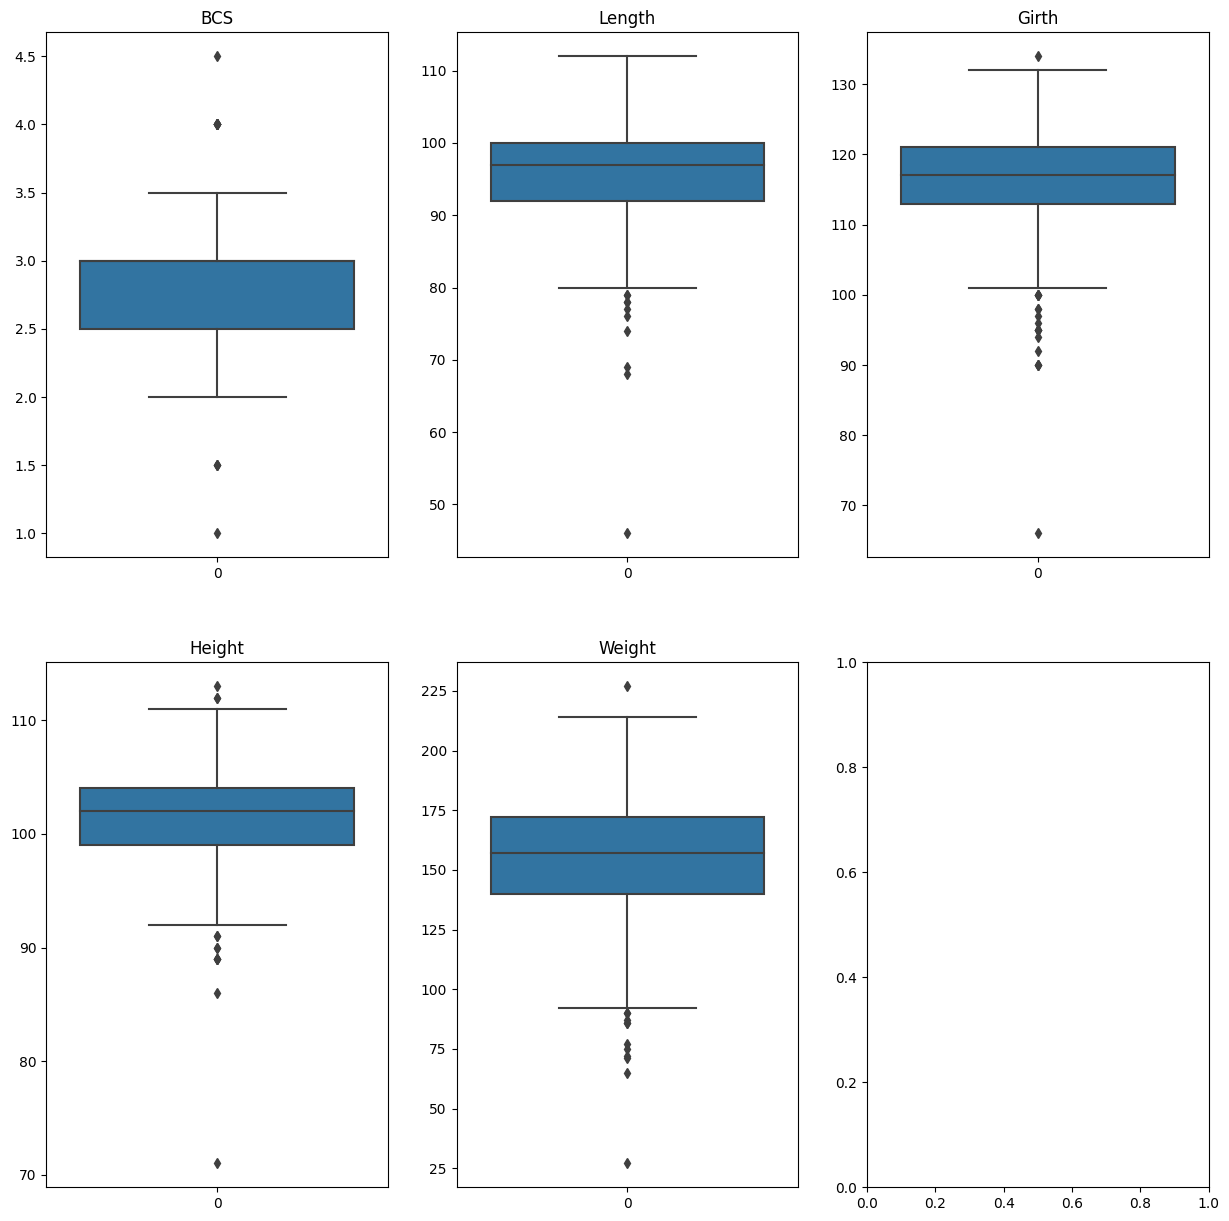

In [25]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

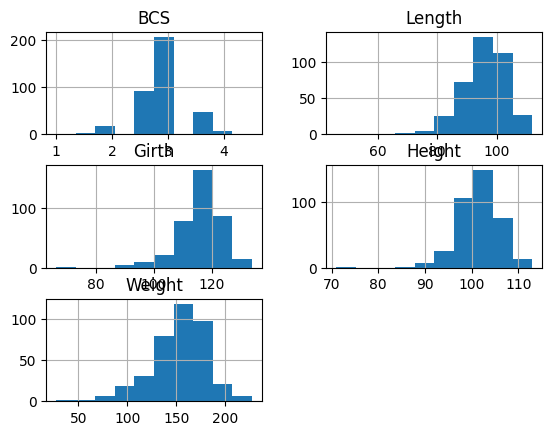

In [28]:
df.hist();

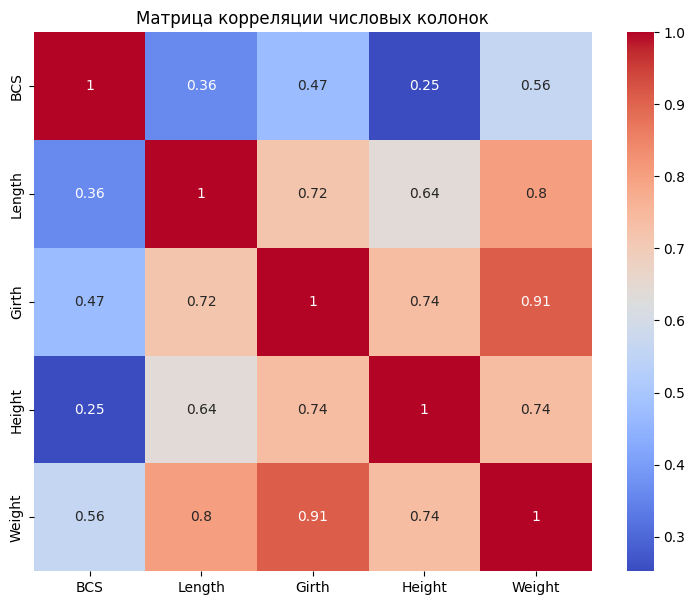

In [31]:
# Фильтруем только числовые колонки
numerical_df = df.select_dtypes(include=['number'])

# Вычисляем матрицу корреляции
corr_matrix = numerical_df.corr()

# Создаем тепловую карту
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# Отображаем график
plt.show()

In [34]:
X = df.drop(['Weight'],axis=1)
y = df['Weight']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,  test_size = 0.2)

In [81]:
X_test

,BCS,Age,Sex,Length,Girth,Height
309,2.5,2-5,female,86,105,100
340,3.5,10-15,gelding,103,128,106
47,3.0,5-10,female,102,113,102
342,3.0,10-15,female,96,118,97
248,2.5,<2,female,79,95,92
...,...,...,...,...,...,...
9,3.0,10-15,female,99,120,100
178,2.5,10-15,stallion,100,114,102
222,3.0,10-15,gelding,94,112,100
234,3.0,15-20,stallion,108,123,104


In [83]:
X_train['Age'].unique()

array(['5-10', '10-15', '<2', '15-20', '>20', '2-5'], dtype=object)

In [85]:
axis_features = ['Length','Girth','Height', 'BCS'] # сюда вписываются числовые колонки
categorical_features = ['Age','Sex'] # сюда вписываются категориальные колонки для OneHotEncoder
# categorical_ordinal = [] # сюда вписываются категориальные в перевод в числа без приориотизации (например, бинарные 0 1)
# categorical_with_order = [] # сюда вписываются категориальные для перевода в числа с приоритизацией порядка (от 0 до N)

# здесь идет преобразование числовых
imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder())
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'Age',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])



CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # здесь идет преобразование числовых
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
#         ("imputer_for_categorical_ordinal", imputer_for_categorical_ordinal, categorical_ordinal), # преобразование категорий в бинарные 0 1
#         ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, categorical_with_order) # преобразование категорий в приоритизированный массив от 0 до N

             ], 
    
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Length', 'Girth', 'Height', 'BCS']),
                                ('imputer_for_categorical_OHE',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OneHotEncoder())]),
                                 ['Age', 'Sex'])])

In [89]:
X_train_new = pd.DataFrame(res_ct, columns=CT.get_feature_names_out())


X_train_new

X_test_new = pd.DataFrame(CT.transform(X_test), columns=CT.get_feature_names_out())


X_test_new

,imputer_for_nums__Length,imputer_for_nums__Girth,imputer_for_nums__Height,imputer_for_nums__BCS,imputer_for_categorical_OHE__Age_10-15,imputer_for_categorical_OHE__Age_15-20,imputer_for_categorical_OHE__Age_2-5,imputer_for_categorical_OHE__Age_5-10,imputer_for_categorical_OHE__Age_<2,imputer_for_categorical_OHE__Age_>20,imputer_for_categorical_OHE__Sex_female,imputer_for_categorical_OHE__Sex_gelding,imputer_for_categorical_OHE__Sex_stallion
0,0.606061,0.573529,0.690476,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.863636,0.911765,0.833333,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.848485,0.691176,0.738095,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.757576,0.764706,0.619048,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.500000,0.426471,0.500000,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.803030,0.794118,0.690476,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,0.818182,0.705882,0.738095,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73,0.727273,0.676471,0.690476,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,0.939394,0.838235,0.785714,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
y_train_new = y_train.values

In [97]:
from pycaret.regression import *
setup(X_train_new,target=y_train_new,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(304, 14)"
4,Transformed data shape,"(304, 14)"
5,Transformed train set shape,"(243, 14)"
6,Transformed test set shape,"(61, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [100]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,6.7525,72.3727,8.3941,0.8820,0.0566,0.0454,0.0060
lr,Linear Regression,6.7358,72.3848,8.3971,0.8816,0.0567,0.0452,0.7190
huber,Huber Regressor,6.6861,72.1155,8.3842,0.8809,0.0563,0.0447,0.0080
lar,Least Angle Regression,6.7842,73.3404,8.4482,0.8807,0.0571,0.0455,0.0060
et,Extra Trees Regressor,6.8340,71.2889,8.3085,0.8777,0.0559,0.0459,0.0260
gbr,Gradient Boosting Regressor,7.1096,78.3102,8.7617,0.8744,0.0571,0.0472,0.0130
catboost,CatBoost Regressor,7.2397,80.6996,8.9041,0.8660,0.0604,0.0489,0.3030
rf,Random Forest Regressor,6.9375,79.5490,8.7780,0.8647,0.0580,0.0464,0.0340
ridge,Ridge Regression,7.5526,88.3982,9.2822,0.8601,0.0627,0.0511,0.0060
ada,AdaBoost Regressor,7.3430,85.8622,9.1831,0.8597,0.0612,0.0496,0.0170


BayesianRidge()

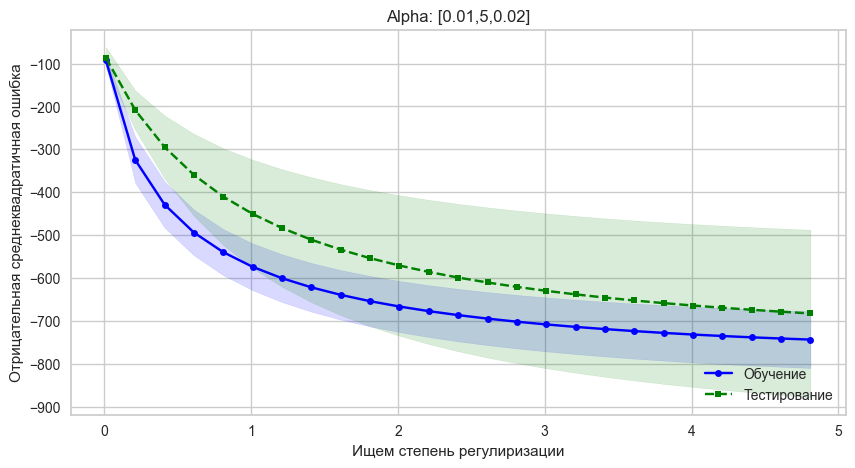

In [104]:
# Подбираем кол-во максимальной выборки max_samples
alpha = np.arange(0.01,5,0.2)
scores_train = []
scores_test = []
for i in alpha:
    elasticnet = Pipeline([ ('preprocessing', CT) , ('regression', ElasticNet(alpha = i))])
    scores_train.append(cross_val_score(elasticnet, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(elasticnet, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Alpha: [0.01,5,0.02]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем степень регулиризации')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

In [118]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', LinearRegression(fit_intercept=False))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 67.30443035222537
Test: 67.55912013041655
Train: 0.04712077983826825
Test: 0.04565787590647296


In [121]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lasso())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 181.74902029954214
Test: 135.72706372629764
Train: 0.07808224136815044
Test: 0.06747619054627417


In [124]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lars())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 86.26151315789474
Test: 76.87088815789474
Train: 0.053018062912768456
Test: 0.04886442068876396


In [127]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', ElasticNet())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 576.0557617265174
Test: 530.7696747578525
Train: 0.1438984922755717
Test: 0.13728330603001487


In [130]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestRegressor(max_features=0.8))])

n_estimators  = np.arange(100,300,50)
# min_samples_leaf = [3,5,7]
max_depth = [8,10,12,14]

# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [RandomForestRegressor(max_features=0.7)],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__max_depth': max_depth

#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Length',
                                                                          'Girth',
                                                                          'Height',
                                                                          'BCS']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['Length',
                                                                              'Girth',
                                                                              'Height',
                                                                              'BCS']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['Age',
                                                                              'Sex'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

<Axes: xlabel='param_classifier__max_depth', ylabel='param_classifier__n_estimators'>

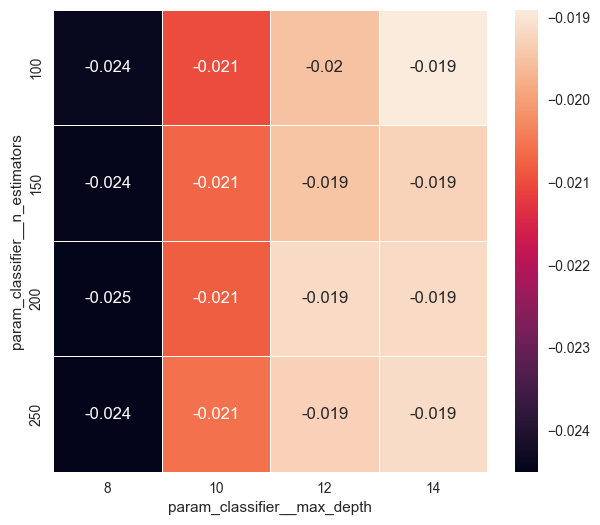

In [132]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__max_depth',values='mean_train_score')
pv_table
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [150]:
a = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True])
a[a['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,param_preprocessing,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.599447,0.057997,0.042037,0.00507,RandomForestRegressor(max_features=0.7),8,250,"ColumnTransformer(remainder='passthrough',\n ...",{'classifier': RandomForestRegressor(max_featu...,-0.046315,...,-0.052077,0.010618,1,-0.025654,-0.025285,-0.024988,-0.022098,-0.024373,-0.02448,0.001263


In [152]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(max_features=0.7, max_depth=8, n_estimators=250 ))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 19.603176052003565
Test: 72.0581352579421
Train: 0.024794339442541363
Test: 0.04465926149731486


In [155]:
# from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', KNeighborsRegressor())])

n_neighbors  = np.arange(1,200,10)
p= [1,2,3]
weights = ['uniform']

param_grid = [
    {'preprocessing': [CT],
    'classifier': [KNeighborsRegressor()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка


# cross_val = StratifiedShuffleSplit(n_splits=3)
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=KFold(5),
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Length',
                                                                          'Girth',
                                                                          'Height',
                                                                          'BCS']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Sim...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['Length',
                                                                              'Girth',
                                                                              'Height',
                                                                              'BCS']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['Age',
                                                                              'Sex'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [157]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,0,2,1,3,4,5,7,6,8,9,...,48,52,53,51,54,55,56,57,58,59
mean_fit_time,0.022045,0.019065,0.025756,0.023032,0.016279,0.015016,0.015618,0.013689,0.016049,0.015277,...,0.017943,0.020249,0.019541,0.016086,0.018567,0.023324,0.017855,0.013949,0.014708,0.013956
std_fit_time,0.001414,0.002394,0.004915,0.009387,0.003408,0.000976,0.000914,0.000402,0.001896,0.001913,...,0.005102,0.000502,0.010617,0.003572,0.006141,0.00961,0.004201,0.003115,0.00113,0.000815
mean_score_time,0.012714,0.015592,0.012861,0.01005,0.011433,0.014207,0.009052,0.010128,0.012704,0.007948,...,0.014174,0.015171,0.019796,0.012969,0.015464,0.014256,0.014422,0.011527,0.009938,0.011174
std_score_time,0.002394,0.007154,0.003259,0.001382,0.002402,0.004186,0.000756,0.002471,0.003088,0.000659,...,0.00261,0.007005,0.007533,0.005521,0.003685,0.004553,0.001325,0.001192,0.000352,0.00168
param_classifier,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),...,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()
param_classifier__n_neighbors,1,1,1,11,11,11,21,21,21,31,...,161,171,171,171,181,181,181,191,191,191
param_classifier__p,1,3,2,1,2,3,2,1,3,1,...,1,2,3,1,1,2,3,1,2,3
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...",...,"{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif..."


In [171]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', KNeighborsRegressor(n_neighbors=6, p = 1))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 153.9016812865497
Test: 129.61622807017548
Train: 0.066020569092554
Test: 0.05715824943262635


In [174]:
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingRegressor())])

n_estimators  = np.arange(100,500,50)
# min_samples_leaf = [1,3,5,7,9,11]
learning_rate = np.arange(0.01,1,0.05)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingRegressor()],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf
     'classifier__learning_rate': learning_rate
    }
] #решетка


grid = GridSearchCV(pipe,param_grid, cv=KFold(5),
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error' ) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Length',
                                                                          'Girth',
                                                                          'Height',
                                                                          'BCS']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Sim...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['Length',
                                                                              'Girth',
                                                                              'Height',
                                                                              'BCS']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['Age',
                                                                              'Sex'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [176]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,24,8,7,9,6,10,11,5,16,12,...,1,152,153,154,157,155,159,156,158,0
mean_fit_time,0.124783,0.120306,0.549171,0.163898,0.446197,0.202051,0.251906,0.379475,0.137149,0.3096,...,0.147668,0.128763,0.154431,0.261144,0.355412,0.259798,0.444887,0.329772,0.410235,0.095924
std_fit_time,0.024888,0.015435,0.065402,0.01555,0.05201,0.006624,0.013368,0.044519,0.030836,0.035903,...,0.004922,0.021365,0.003203,0.05358,0.019074,0.027591,0.062631,0.047981,0.046863,0.004052
mean_score_time,0.021762,0.010184,0.011029,0.009853,0.009896,0.008579,0.011306,0.009278,0.006894,0.008799,...,0.007903,0.008256,0.008206,0.011802,0.008711,0.006572,0.006249,0.009152,0.016029,0.00568
std_score_time,0.015494,0.000874,0.00264,0.002209,0.002183,0.001991,0.004678,0.002526,0.00294,0.00392,...,0.005945,0.00714,0.00677,0.005203,0.007232,0.008066,0.007654,0.007484,0.000474,0.005738
param_classifier,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),...,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor()
param_classifier__learning_rate,0.16,0.06,0.01,0.06,0.01,0.06,0.06,0.01,0.11,0.06,...,0.01,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.01
param_classifier__n_estimators,100,100,450,150,400,200,250,350,100,300,...,150,100,150,200,350,250,450,300,400,100
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...",...,"{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c..."
split0_test_score,-0.043466,-0.047046,-0.046481,-0.047473,-0.047263,-0.048622,-0.049058,-0.048178,-0.048209,-0.049306,...,-0.06669,-0.070324,-0.069335,-0.070646,-0.072262,-0.072748,-0.071237,-0.074474,-0.074396,-0.082339


In [182]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T.loc['params', 24]

{'classifier': GradientBoostingRegressor(),
 'classifier__learning_rate': 0.16000000000000003,
 'classifier__n_estimators': 100,
 'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('imputer_for_nums',
                                  Pipeline(steps=[('imputer', KNNImputer()),
                                                  ('scaler', MinMaxScaler())]),
                                  ['Length', 'Girth', 'Height', 'BCS']),
                                 ('imputer_for_categorical_OHE',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('scaler', OneHotEncoder())]),
                                  ['Age', 'Sex'])])}

<Axes: xlabel='param_classifier__learning_rate', ylabel='param_classifier__n_estimators'>

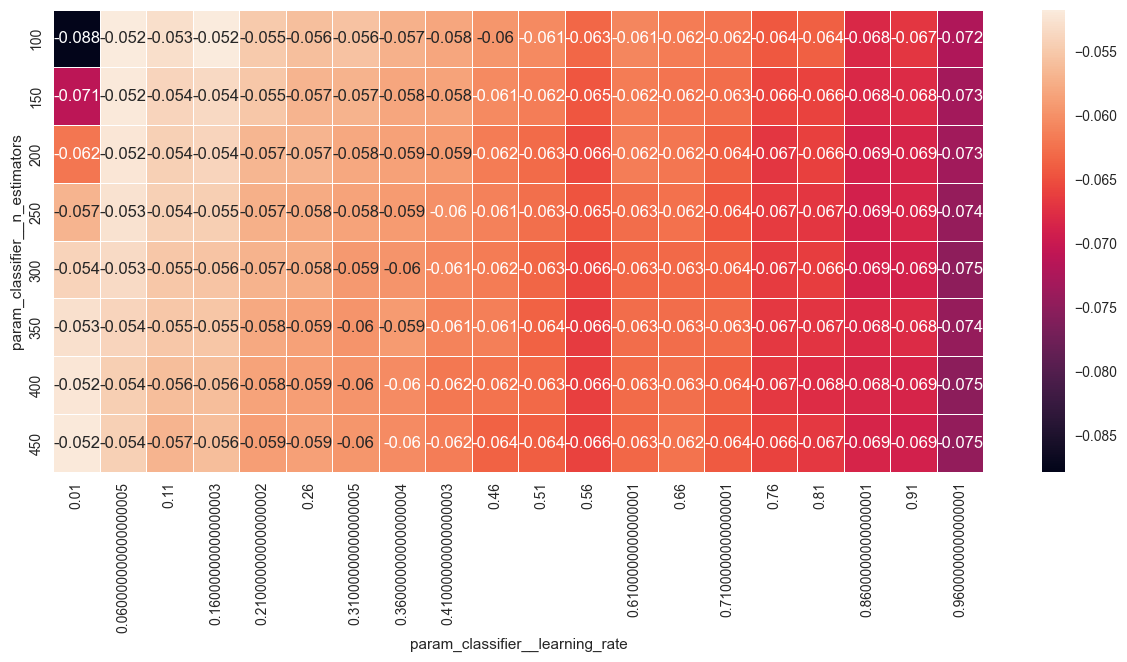

In [191]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__learning_rate',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [211]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', GradientBoostingRegressor(learning_rate = 0.16000000000000003, n_estimators = 100))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 20.467552244000892
Test: 97.09197492132299
Train: 0.02277463338587017
Test: 0.051643961225607056


In [214]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVR(kernel = 'rbf'))])

C=np.array([0.5,1,2,3,5,10])
gamma=[0.01,0.05,0.1]


param_grid =[
    {'preprocessing': [CT], 
     'classifier': [SVR()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe, param_grid, cv=KFold(5), return_train_score=True, scoring= 'neg_mean_absolute_percentage_error', n_jobs = -1)
grid.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Length',
                                                                          'Girth',
                                                                          'Height',
                                                                          'BCS']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Sim...
                                                              transformers=[('imputer_for_nums',
                                                                             Pipeline(steps=[('imputer',
                                                                                              KNNImputer()),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['Length',
                                                                              'Girth',
                                                                              'Height',
                                                                              'BCS']),
                                                                            ('imputer_for_categorical_OHE',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['Age',
                                                                              'Sex'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

<Axes: xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

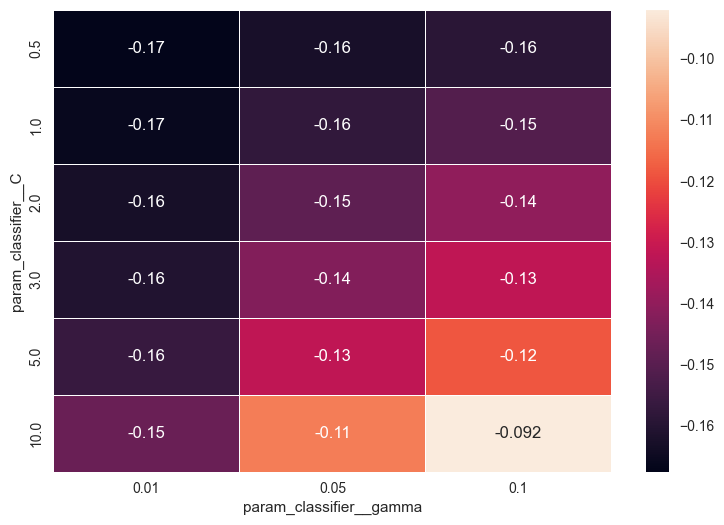

In [216]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [219]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,17,16,14,11,13,8,10,15,7,5,12,4,2,9,1,6,3,0
mean_fit_time,0.02088,0.019807,0.022627,0.020627,0.021377,0.021041,0.021233,0.01865,0.039114,0.071189,0.021099,0.020071,0.02607,0.019815,0.025738,0.036016,0.022398,0.026419
std_fit_time,0.003048,0.001532,0.004075,0.001582,0.004138,0.001157,0.003393,0.001311,0.015053,0.047591,0.001792,0.001143,0.004275,0.001575,0.003681,0.015937,0.002537,0.004322
mean_score_time,0.009081,0.011702,0.009302,0.012472,0.012895,0.011076,0.010532,0.010481,0.015291,0.010144,0.010853,0.013282,0.011664,0.011032,0.012833,0.011092,0.010919,0.012993
std_score_time,0.001465,0.002145,0.001582,0.002534,0.004819,0.000676,0.000448,0.001025,0.004984,0.000918,0.001214,0.004407,0.00043,0.000795,0.001426,0.00107,0.000058,0.001028
param_classifier,SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR()
param_classifier__C,10.0,10.0,5.0,3.0,5.0,2.0,3.0,10.0,2.0,1.0,5.0,1.0,0.5,3.0,0.5,2.0,1.0,0.5
param_classifier__gamma,0.1,0.05,0.1,0.1,0.05,0.1,0.05,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.01,0.01,0.01
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': SVR(), 'classifier__C': 10.0, '...","{'classifier': SVR(), 'classifier__C': 10.0, '...","{'classifier': SVR(), 'classifier__C': 5.0, 'c...","{'classifier': SVR(), 'classifier__C': 3.0, 'c...","{'classifier': SVR(), 'classifier__C': 5.0, 'c...","{'classifier': SVR(), 'classifier__C': 2.0, 'c...","{'classifier': SVR(), 'classifier__C': 3.0, 'c...","{'classifier': SVR(), 'classifier__C': 10.0, '...","{'classifier': SVR(), 'classifier__C': 2.0, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 5.0, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 3.0, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 2.0, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c..."
split0_test_score,-0.091353,-0.116726,-0.118798,-0.129054,-0.130345,-0.134803,-0.136983,-0.140913,-0.142027,-0.143438,-0.149017,-0.149934,-0.151183,-0.153543,-0.154997,-0.155572,-0.158367,-0.160057


In [221]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', SVR(C = 10, gamma = 0.1))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 216.19690993209468
Test: 168.98626513532844
Train: 0.08649140386393372
Test: 0.07497316457101247
